## Health Insurance Analysis in U.S. (2010 to 2016)

Health insurance coverage data compiled from the US Department of Health and Human Services and US Census Bureau.

*Source:* https://www.kaggle.com/hhs/health-insurance


In [22]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../metis_IDS_project/states.csv")


# Research Questions

**RQ1.** How has employer-sponsored health insurance coverage decreased the uninsured rates in various states?

**RQ2.** How has Medicare expansion decreased the uninsured rates in the states that expanded?

**RQ3.** Can we predict the next five years of nationwide health insurance coverage based on this data set?

# Cleaning Data


In [23]:
# Preview DataFrame
df.info()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 14 columns):
State                                           52 non-null object
Uninsured Rate (2010)                           52 non-null object
Uninsured Rate (2015)                           52 non-null object
Uninsured Rate Change (2010-2015)               52 non-null object
Health Insurance Coverage Change (2010-2015)    52 non-null int64
Employer Health Insurance Coverage (2015)       52 non-null int64
Marketplace Health Insurance Coverage (2016)    52 non-null int64
Marketplace Tax Credits (2016)                  52 non-null int64
Average Monthly Tax Credit (2016)               52 non-null object
State Medicaid Expansion (2016)                 51 non-null object
Medicaid Enrollment (2013)                      50 non-null float64
Medicaid Enrollment (2016)                      52 non-null int64
Medicaid Enrollment Change (2013-2016)          50 non-null float64
Medicare Enrollment (2016)   

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [24]:
# 1. Clean up column names (replace special characters and spaces with an underscore).

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_')


In [25]:
df.head(5)

,state,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change_2010_2015,health_insurance_coverage_change_2010_2015,employer_health_insurance_coverage_2015,marketplace_health_insurance_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,state_medicaid_expansion_2016,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change_2013_2016,medicare_enrollment_2016
0,Alabama,14.6%,10.1%,-4.5%,215000,2545000,165534,152206,$310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9%,14.9%,-5%,36000,390000,17995,16205,$750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9%,10.8%,-6.1%,410000,3288000,179445,124346,$230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5%,9.5%,-8%,234000,1365000,63357,56843,$306,True,556851.0,920194,363343.0,606146
4,California,18.5%,8.6%,-9.9%,3826000,19552000,1415428,1239893,$309,True,7755381.0,11843081,4087700.0,5829777


In [26]:
# 2. Clean up date in columns (remove special characters). 
df["uninsured_rate_2010"] = df["uninsured_rate_2010"].apply(lambda x: x.replace('%',''))
df["uninsured_rate_2015"] = df["uninsured_rate_2015"].apply(lambda x: x.replace('%',''))
df["uninsured_rate_change_2010_2015"] = df["uninsured_rate_change_2010_2015"].apply(lambda x: x.replace('%',''))
df["average_monthly_tax_credit_2016"] = df["average_monthly_tax_credit_2016"].apply(lambda x: x.replace('$',''))

df.head()


,state,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change_2010_2015,health_insurance_coverage_change_2010_2015,employer_health_insurance_coverage_2015,marketplace_health_insurance_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,state_medicaid_expansion_2016,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change_2013_2016,medicare_enrollment_2016
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5,36000,390000,17995,16205,750,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8,234000,1365000,63357,56843,306,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309,True,7755381.0,11843081,4087700.0,5829777


In [27]:
# 3. Convert objects to floats.
df["uninsured_rate_2010"] = df["uninsured_rate_2010"].astype(str).astype(float)
df["uninsured_rate_2015"] = df["uninsured_rate_2015"].astype(str).astype(float)
df["uninsured_rate_change_2010_2015"] = df["uninsured_rate_change_2010_2015"].astype(str).astype(float)
df["average_monthly_tax_credit_2016"] = df["average_monthly_tax_credit_2016"].astype(str).astype(float)

df.dtypes


state                                          object
uninsured_rate_2010                           float64
uninsured_rate_2015                           float64
uninsured_rate_change_2010_2015               float64
health_insurance_coverage_change_2010_2015      int64
employer_health_insurance_coverage_2015         int64
marketplace_health_insurance_coverage_2016      int64
marketplace_tax_credits_2016                    int64
average_monthly_tax_credit_2016               float64
state_medicaid_expansion_2016                  object
medicaid_enrollment_2013                      float64
medicaid_enrollment_2016                        int64
medicaid_enrollment_change_2013_2016          float64
medicare_enrollment_2016                        int64
dtype: object

In [28]:
# 4. Replace True/False with Yes/No in column state_medicaid_expansion_2016.
df = df.replace(to_replace = [False, True], value = ["No", "Yes"])


In [32]:
# 5. Replace missing data points (NaN) with zero. 
df.fillna(0)


,state,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change_2010_2015,health_insurance_coverage_change_2010_2015,employer_health_insurance_coverage_2015,marketplace_health_insurance_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,state_medicaid_expansion_2016,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change_2013_2016,medicare_enrollment_2016
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,No,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,Yes,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,Yes,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,Yes,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,Yes,7755381.0,11843081,4087700.0,5829777
5,Colorado,15.9,8.1,-7.8,419000,2949000,108311,67062,318.0,Yes,783420.0,1375264,591844.0,820234
6,Connecticut,9.1,6.0,-3.1,110000,2148000,102917,80759,357.0,Yes,0.0,761137,0.0,644136
7,Delaware,9.7,5.9,-3.8,35000,564000,25379,21467,330.0,Yes,223324.0,236702,13378.0,186835
8,District of Columbia,7.6,3.8,-3.8,25000,388000,17666,1224,183.0,Yes,235786.0,255491,19705.0,90492
9,Florida,21.3,13.3,-8.0,1597000,8847000,1531714,1428712,305.0,No,3104996.0,3644673,539677.0,4149593


In [33]:
# Preview of clean DataFrame 
df.head()


,state,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change_2010_2015,health_insurance_coverage_change_2010_2015,employer_health_insurance_coverage_2015,marketplace_health_insurance_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,state_medicaid_expansion_2016,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change_2013_2016,medicare_enrollment_2016
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,No,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,Yes,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,Yes,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,Yes,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,Yes,7755381.0,11843081,4087700.0,5829777


# Correlation 

### What correlations exist between that changes in health insurance between 2010 and 2016?

In [34]:
df.corr()


,uninsured_rate_2010,uninsured_rate_2015,uninsured_rate_change_2010_2015,health_insurance_coverage_change_2010_2015,employer_health_insurance_coverage_2015,marketplace_health_insurance_coverage_2016,marketplace_tax_credits_2016,average_monthly_tax_credit_2016,medicaid_enrollment_2013,medicaid_enrollment_2016,medicaid_enrollment_change_2013_2016,medicare_enrollment_2016
uninsured_rate_2010,1.000000,0.869074,-0.512217,0.127835,0.081566,0.127179,0.133772,0.259979,0.078675,0.088080,0.086789,0.084742
uninsured_rate_2015,0.869074,1.000000,-0.160628,0.072594,0.050499,0.098219,0.104914,0.387787,0.047176,0.044161,0.017247,0.053159
uninsured_rate_change_2010_2015,-0.512217,-0.160628,1.000000,0.507685,0.562773,0.542041,0.538093,0.050172,0.576815,0.541092,0.517548,0.561724
health_insurance_coverage_change_2010_2015,0.127835,0.072594,0.507685,1.000000,0.994852,0.994007,0.992927,-0.020190,0.995612,0.997142,0.993211,0.994144
employer_health_insurance_coverage_2015,0.081566,0.050499,0.562773,0.994852,1.000000,0.993882,0.991851,-0.029105,0.998722,0.998084,0.985844,0.999484
marketplace_health_insurance_coverage_2016,0.127179,0.098219,0.542041,0.994007,0.993882,1.000000,0.999825,-0.008075,0.991694,0.991108,0.979194,0.995248
marketplace_tax_credits_2016,0.133772,0.104914,0.538093,0.992927,0.991851,0.999825,1.000000,-0.003210,0.989580,0.989097,0.977569,0.993561
average_monthly_tax_credit_2016,0.259979,0.387787,0.050172,-0.020190,-0.029105,-0.008075,-0.003210,1.000000,-0.027559,-0.030081,-0.013936,-0.025097
medicaid_enrollment_2013,0.078675,0.047176,0.576815,0.995612,0.998722,0.991694,0.989580,-0.027559,1.000000,0.999405,0.987719,0.998103
medicaid_enrollment_2016,0.088080,0.044161,0.541092,0.997142,0.998084,0.991108,0.989097,-0.030081,0.999405,1.000000,0.992505,0.997334


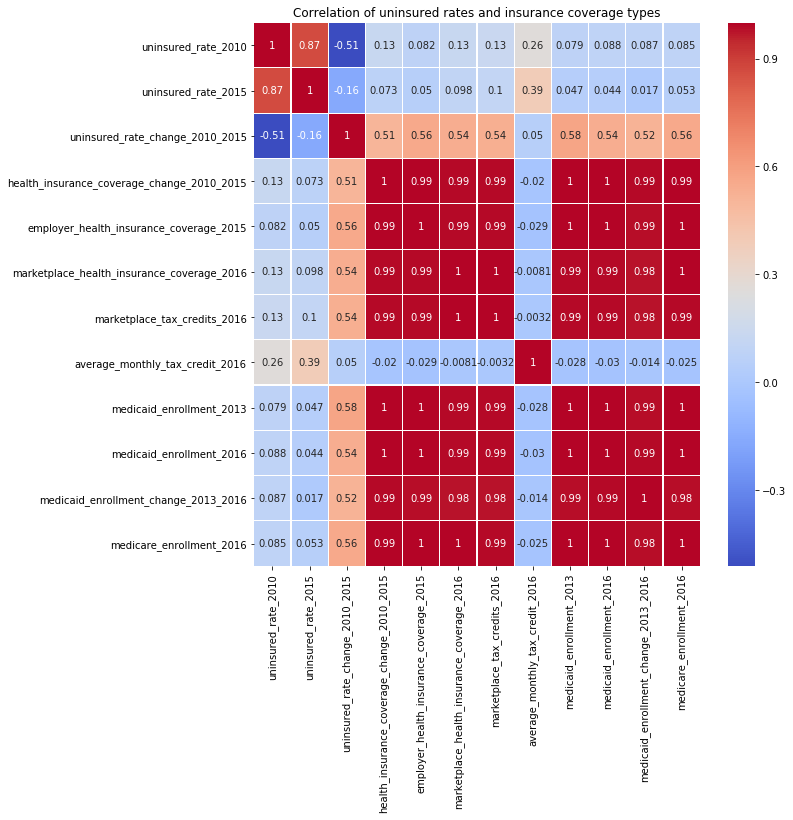

In [35]:
plt.figure(figsize=(10,10))
hi_corr = df.corr()
heatmap = sns.heatmap(hi_corr, annot=True, linewidth=0.1, cmap='coolwarm', ) 
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation of uninsured rates and insurance coverage types")
plt.show(heatmap)


### Strong Correlation: 

###### Health Insurance Coverage Change 2010-2015:

```
employer_health_insurance_coverage_2015
marketplace_health_insurance_coverage_2016      
medicaid_enrollment_2013                      
medicaid_enrollment_2016                      
medicare_enrollment_2016                      
```



# GroupBy

### Are correlations stronger between states that expanded Medicaid and those that didn't?

In [12]:
# Create groups of states by Medicaid expanision in 2016:
#    Expanded_Group = 32 states
#    Nonexp_Group = 19 states

state_medicaid_expansion_2016_group = df.groupby('state_medicaid_expansion_2016')
Expanded_Group = state_medicaid_expansion_2016_group.get_group('Yes')
Nonexp_Group = state_medicaid_expansion_2016_group.get_group('No') 


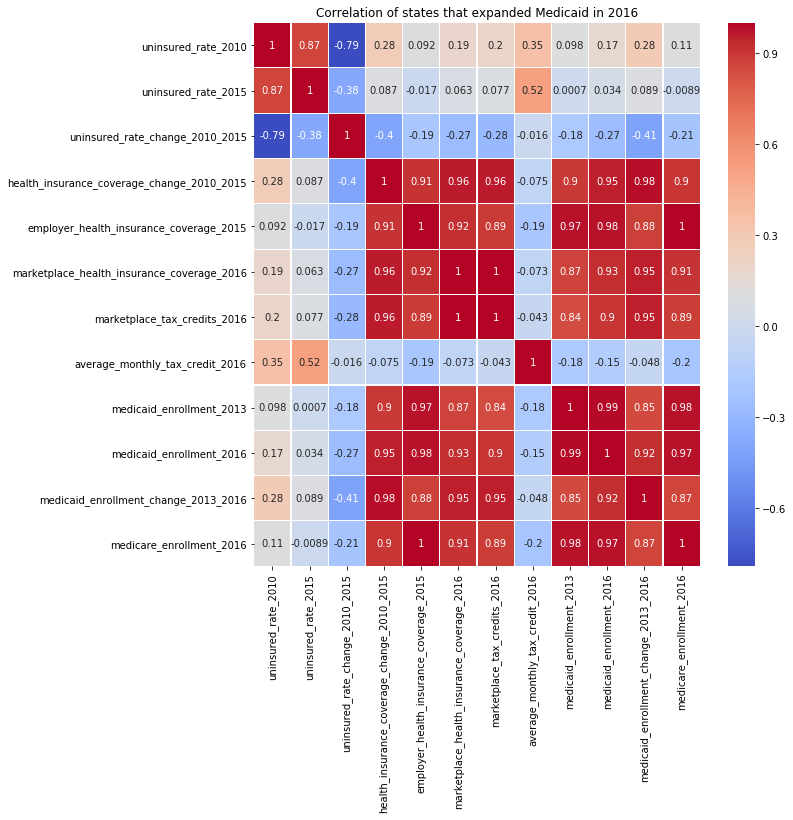

In [13]:
# Expanded_Group Correlation

plt.figure(figsize=(10,10))
Expanded_Group_corr = Expanded_Group.corr()
heatmap = sns.heatmap(Expanded_Group_corr, annot=True, linewidth=0.1, cmap='coolwarm', ) 
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation of states that expanded Medicaid in 2016")
plt.show(heatmap)


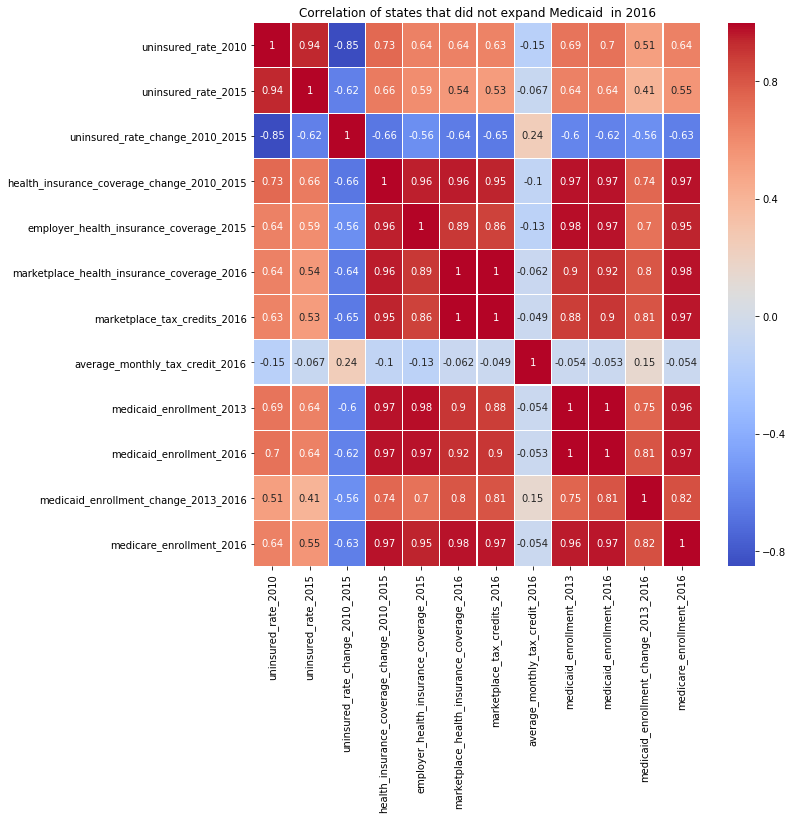

In [14]:
# Nonexp_Group Correlations

plt.figure(figsize=(10,10))
Nonexp_Group_corr = Nonexp_Group.corr()
heatmap = sns.heatmap(Nonexp_Group_corr, annot=True, linewidth=0.1, cmap='coolwarm', ) 
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation of states that did not expand Medicaid  in 2016")
plt.show(heatmap)


### Comparison: 

###### Medcaid Expanded: Health Insurance Coverage Change 2010-2015:

```
employer_health_insurance_coverage_2015       0.91
marketplace_health_insurance_coverage_2016    0.96  
medicaid_enrollment_2013                      0.90
medicaid_enrollment_2016                      0.95
medicare_enrollment_2016                      0.90
```

###### Medcaid Not Expanded: Health Insurance Coverage Change 2010-2015:

```
employer_health_insurance_coverage_2015       0.96
marketplace_health_insurance_coverage_2016    0.96  
medicaid_enrollment_2013                      0.97
medicaid_enrollment_2016                      0.97
medicare_enrollment_2016                      0.97
```



# Pair Plots

### Can we see what features may have a linear relationship?

In [15]:
# Removing object columns for pairplots: state & state_medicaid_expansion_2016

df_nums = df.drop(['state','state_medicaid_expansion_2016'], axis=1)
Expanded_Group_Nums = Expanded_Group.drop(['state','state_medicaid_expansion_2016'], axis=1)
Nonexp_Group_Nums = Nonexp_Group.drop(['state','state_medicaid_expansion_2016'], axis=1)


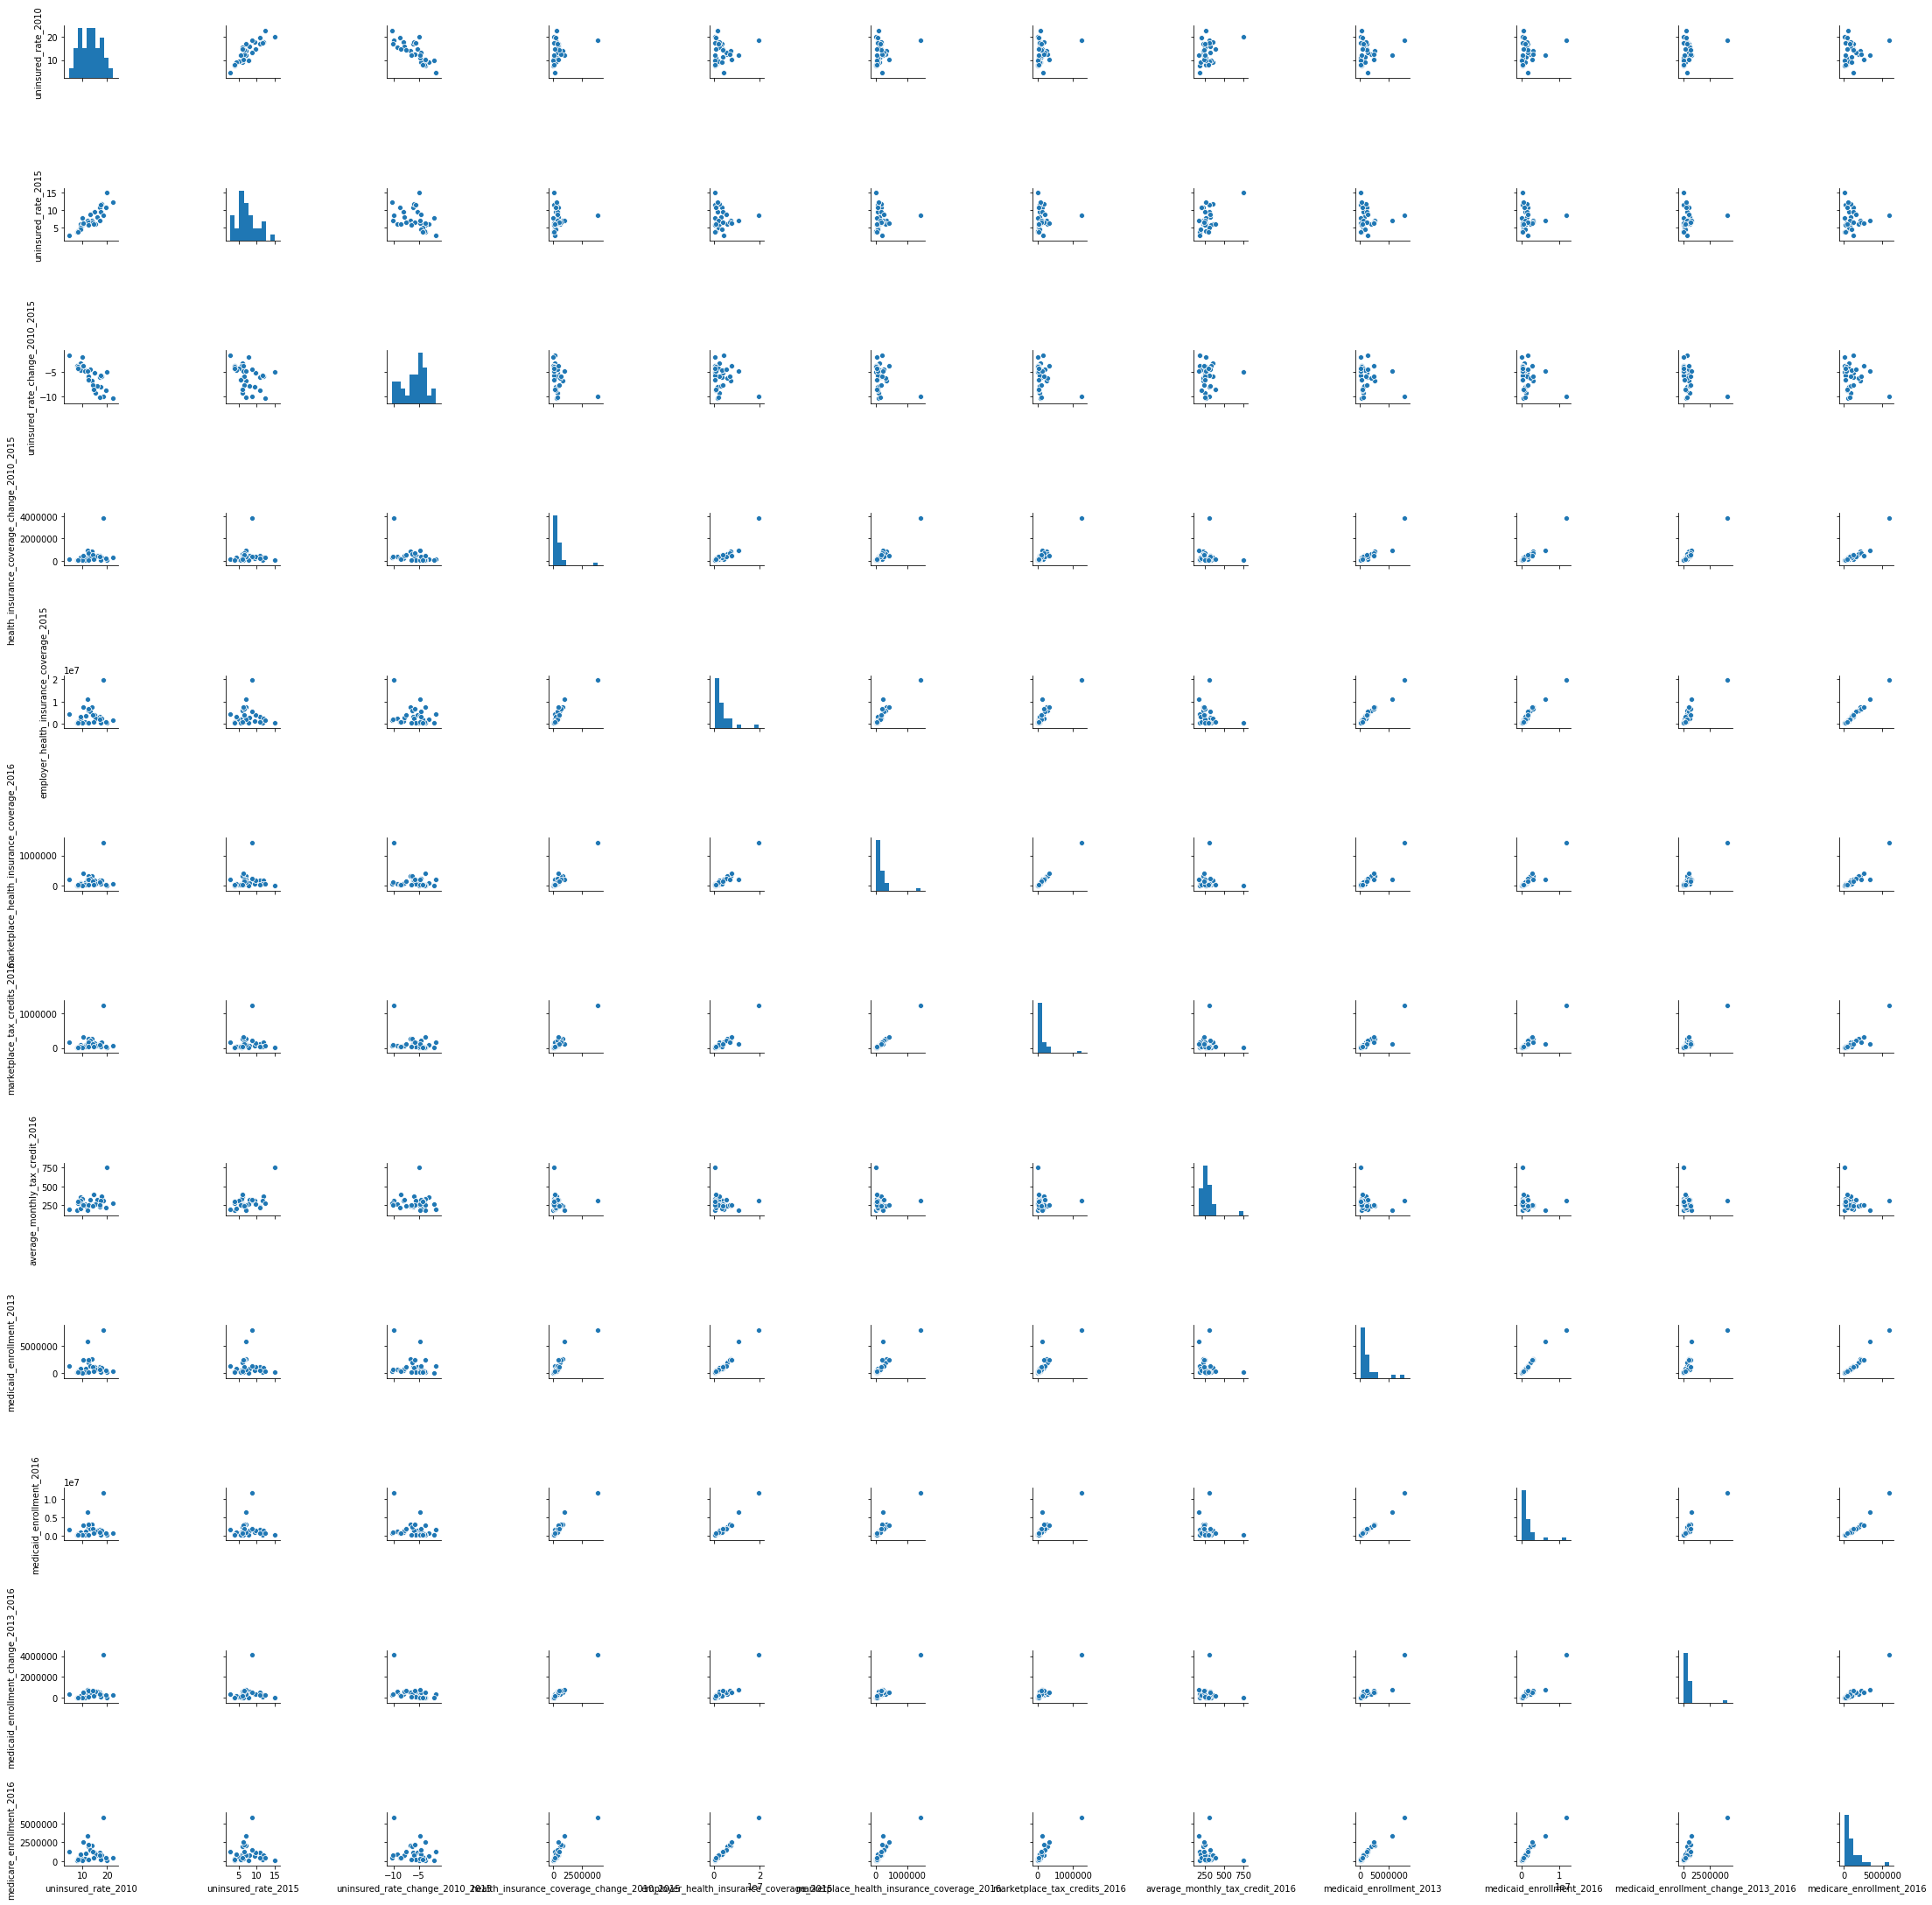

In [40]:
# Pairplot for all states that expanded Medicaid.
np.warnings.filterwarnings('ignore')
sns.pairplot(Expanded_Group_Nums)


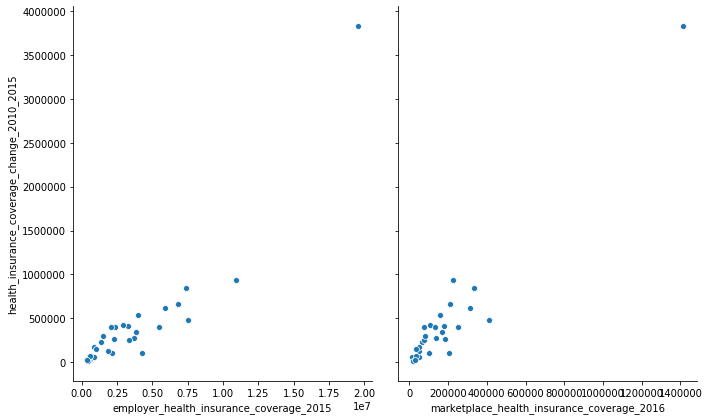

In [43]:
# Closer look at two pairplots from above.

#   health_insurance_coverage_change_2010_2015 v employer_health_insurance_coverage_2015
#   health_insurance_coverage_change_2010_2015 v marketplace_health_insurance_coverage_2016

sns.pairplot(Expanded_Group_Nums, x_vars=['employer_health_insurance_coverage_2015','marketplace_health_insurance_coverage_2016'], y_vars='health_insurance_coverage_change_2010_2015', height=6, aspect=0.8);


### Potential Linear Regression Features: 

```
health_insurance_coverage_change_2010_2015 v employer_health_insurance_coverage_2015
```

# Linear Regression

### For all states: How are health insurance coverage changes (2010-2015) and employer health insurance related ? 

The y-intercept: -652.62
The single coefficient: [0.11]


(0, 33879710.671430364)

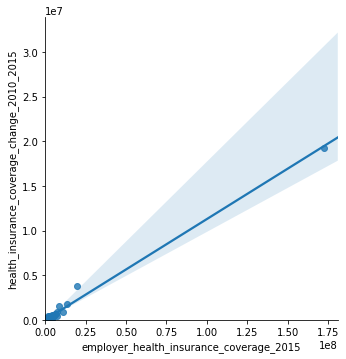

In [44]:
feature_cols = ['employer_health_insurance_coverage_2015']
X = df_nums[feature_cols]
y = df_nums.health_insurance_coverage_change_2010_2015
cvg_linreg = LinearRegression()
cvg_linreg.fit(X, y)

print("The y-intercept:", cvg_linreg.intercept_.round(2))
print("The single coefficient:", cvg_linreg.coef_.round(2))

sns.pairplot(df_nums,x_vars=['employer_health_insurance_coverage_2015'],y_vars='health_insurance_coverage_change_2010_2015',height=5, aspect=1,kind='reg');
sns.mpl.pyplot.xlim(0,)
sns.mpl.pyplot.ylim(0,)

### For states that expanded Medicaid: How are health insurance coverage changes (2010-2015) and employer health insurance related? 

The y-intercept: -139375.23
The single coefficient: [0.16]


(0, 4035963.4685818614)

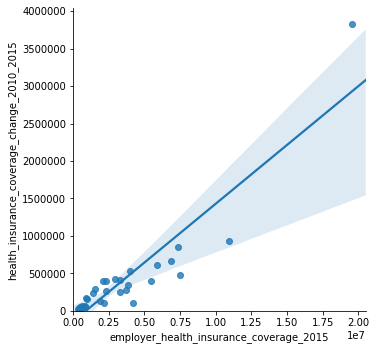

In [45]:
feature_cols = ['employer_health_insurance_coverage_2015']
X = Expanded_Group_Nums[feature_cols]
y = Expanded_Group_Nums.health_insurance_coverage_change_2010_2015
cvg_linreg = LinearRegression()
cvg_linreg.fit(X, y)

print("The y-intercept:", cvg_linreg.intercept_.round(2))
print("The single coefficient:", cvg_linreg.coef_.round(2))

sns.pairplot(Expanded_Group_Nums,x_vars=['employer_health_insurance_coverage_2015'],y_vars='health_insurance_coverage_change_2010_2015',height=5, aspect=1,kind='reg');
sns.mpl.pyplot.xlim(0,)
sns.mpl.pyplot.ylim(0,)

### Comparison: 

###### Y-intercept comparisons:
```
All states:                  -652.62
Medicaid expanded states: -139375.23
```

###### Single coeffiencts:
```
All states:                   0.11
Medicaid expanded states:     0.16
```